In [169]:
import pandas as pd
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import Page, Pie 
import matplotlib.pyplot as plt

In [170]:
subscribers = pd.read_csv('subscribers.csv')

In [171]:
subscribers.drop('Unnamed: 0',axis=1,inplace=True)
pd.set_option('display.max_columns',None)
subscribers.head(5)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


## Data Cleaning

In [172]:
subscribers.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,192724.000000,227628.000000,227628.000000
mean,2.498624e+07,3.008824,27.997724,2.061260,7.579755e+02,4.0,4.732049,4.512188,0.115145,13.989544,0.790122
std,2.885543e+06,0.820526,4.976341,0.245907,1.920204e+05,0.0,0.101049,0.097078,0.176971,0.382453,0.777713
min,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.660600,0.000000,0.000000
25%,2.248998e+07,2.000000,24.401536,2.000000,3.500000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,2.497011e+07,3.000000,27.301448,2.000000,4.600000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,2.749020e+07,3.000000,30.201361,2.000000,5.700000e+01,4.0,4.734300,4.514100,0.110100,14.000000,1.000000
max,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


In [173]:
subscribers.describe(include=[object])

,package_type,preferred_genre,intended_use,male_TF,country,attribution_technical,attribution_survey,op_sys,plan_type,account_creation_date,trial_end_date,language,payment_type,last_payment,next_payment,cancel_date
count,192054,191302,224079,227359,227628,227628,224984,214253,227628,227628,227628,227628,92050,132237,130250,36831
unique,3,5,7,2,1,33,16,2,11,226023,226023,1,6,131339,129206,284
top,base,comedy,access to exclusive content,False,UAE,facebook,facebook,iOS,base_uae_14_day_trial,2019-12-28 16:35:34,2019-07-14 14:47:57,ar,Standard Charter,2020-03-08 19:00:43,2020-03-28 18:22:06,2019-07-13 00:00:00
freq,111464,125129,89039,200902,227628,80251,119126,143921,227096,3,3,227628,38810,3,3,431


In [174]:
col = subscribers.columns

delete features with unique values

In [175]:
subscribers.drop('months_per_bill_period',axis=1,inplace=True)
subscribers.drop('country',axis=1,inplace=True)
subscribers.drop('language',axis=1,inplace=True)

delete abnormal instances

In [176]:
subscribers=subscribers[(subscribers['age']<=100) & (subscribers['age']>0)]
subscribers = subscribers[subscribers['weekly_consumption_hour']>=0]
subscribers = subscribers[subscribers['num_ideal_streaming_services']>=0]
subscribers = subscribers[subscribers['join_fee']>=0]

## Customer Segmentation

In [177]:
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114870 entries, 2 to 227624
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         114870 non-null  int64  
 1   package_type                  93182 non-null   object 
 2   num_weekly_services_utilized  114870 non-null  float64
 3   preferred_genre               92786 non-null   object 
 4   intended_use                  113735 non-null  object 
 5   weekly_consumption_hour       114870 non-null  float64
 6   num_ideal_streaming_services  114870 non-null  float64
 7   age                           114870 non-null  float64
 8   male_TF                       114870 non-null  object 
 9   attribution_technical         114870 non-null  object 
 10  attribution_survey            114334 non-null  object 
 11  op_sys                        114870 non-null  object 
 12  plan_type                     114870 non-nul

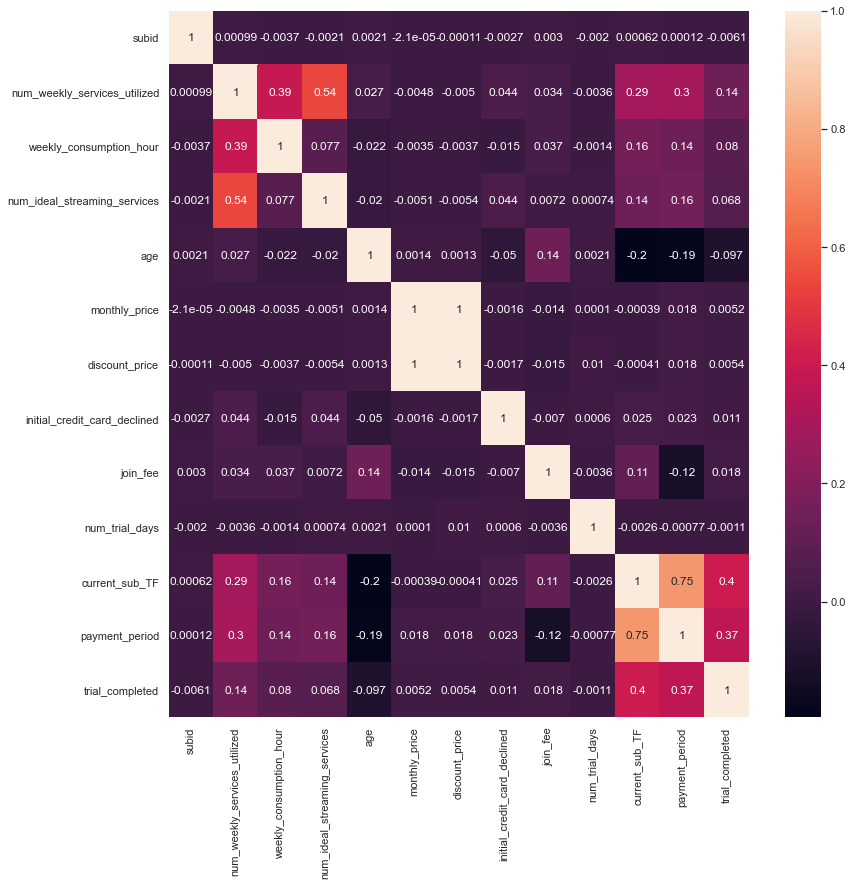

In [178]:
sns.set(rc={'figure.figsize':(13,13)})
sns.heatmap(subscribers.corr(), annot = True)

num_ideal_streaming_services and num_weekly_services_utilized,  
monthly_price and discount_price,  
payment_period and current_sub_TF  
are highly correlated  

Feature Selection

In [179]:
subscribers.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF',
       'attribution_technical', 'attribution_survey', 'op_sys', 'plan_type',
       'monthly_price', 'discount_price', 'account_creation_date',
       'trial_end_date', 'initial_credit_card_declined', 'join_fee',
       'payment_type', 'num_trial_days', 'current_sub_TF', 'payment_period',
       'last_payment', 'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

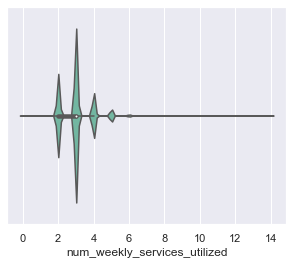

In [180]:
sns.set(rc={'figure.figsize':(5,4)})
sns.violinplot(x='num_weekly_services_utilized',data=subscribers, palette="Set2")

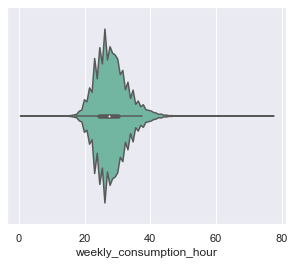

In [181]:
sns.violinplot(x='weekly_consumption_hour',data=subscribers, palette="Set2")

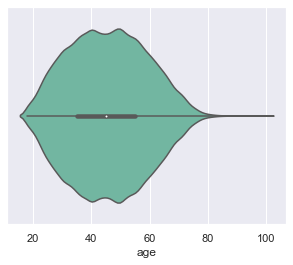

In [182]:
sns.violinplot(x='age',data=subscribers, palette="Set2")

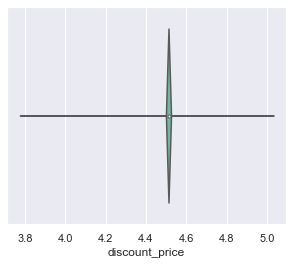

In [183]:
sns.violinplot(x='discount_price',data=subscribers, palette="Set2")

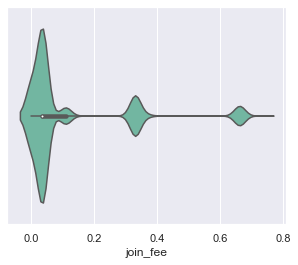

In [184]:
sns.violinplot(x='join_fee',data=subscribers, palette="Set2")

In [185]:
subscribers['discount_price'].value_counts()

4.5141    114663
5.0279       184
4.0737         9
4.2205         8
4.3673         3
3.7801         2
4.4407         1
Name: discount_price, dtype: int64

In [186]:
subscribers['num_trial_days'].value_counts()

14    114869
0          1
Name: num_trial_days, dtype: int64

In [187]:
subscribers['initial_credit_card_declined'].value_counts()

False    110297
True       4573
Name: initial_credit_card_declined, dtype: int64

In [188]:
subscribers['payment_type'].value_counts()

Standard Charter    16250
Paypal              12630
RAKBANK              7413
CBD                  3215
Najim                1751
Apple Pay               2
Name: payment_type, dtype: int64

In [390]:
segmentation = subscribers[['package_type', 'num_weekly_services_utilized','preferred_genre', 
                            'age', 'intended_use', 'weekly_consumption_hour', 'male_TF'
                            , 'op_sys','discount_price','join_fee',
                            'current_sub_TF', 'payment_period']]

In [391]:
segmentation=segmentation[segmentation['preferred_genre'].notna()]

In [392]:
segmentation['payment_period']=segmentation['payment_period'].astype('str')

In [393]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92786 entries, 2 to 227624
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   package_type                  92732 non-null  object 
 1   num_weekly_services_utilized  92786 non-null  float64
 2   preferred_genre               92786 non-null  object 
 3   age                           92786 non-null  float64
 4   intended_use                  92576 non-null  object 
 5   weekly_consumption_hour       92786 non-null  float64
 6   male_TF                       92786 non-null  object 
 7   op_sys                        92786 non-null  object 
 8   discount_price                92786 non-null  float64
 9   join_fee                      92786 non-null  float64
 10  current_sub_TF                92786 non-null  bool   
 11  payment_period                92786 non-null  object 
dtypes: bool(1), float64(5), object(6)
memory usage: 8.6+ MB


One-Hot-Encoding

In [394]:
segmentation_d = pd.get_dummies(data=segmentation, columns=['package_type','preferred_genre', 'male_TF',
                                                            'intended_use', 'op_sys','payment_period'])

In [395]:
segmentation_d

,num_weekly_services_utilized,age,weekly_consumption_hour,discount_price,join_fee,current_sub_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,payment_period_0,payment_period_1,payment_period_2,payment_period_3
2,3.0,25.0,36.001186,4.5141,0.1101,False,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0
4,4.0,28.0,22.951579,4.5141,0.0367,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
6,2.0,61.0,20.051667,4.5141,0.3303,True,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
7,3.0,23.0,34.551230,4.5141,0.0000,True,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
9,3.0,71.0,28.751405,4.5141,0.3303,False,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227616,4.0,44.0,27.301448,4.5141,0.0000,True,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
227619,3.0,32.0,30.201361,4.5141,0.0000,True,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
227622,2.0,43.0,24.401536,4.5141,0.0000,True,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
227623,3.0,38.0,28.751405,4.5141,0.3303,True,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [396]:
segmentation_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92786 entries, 2 to 227624
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   num_weekly_services_utilized              92786 non-null  float64
 1   age                                       92786 non-null  float64
 2   weekly_consumption_hour                   92786 non-null  float64
 3   discount_price                            92786 non-null  float64
 4   join_fee                                  92786 non-null  float64
 5   current_sub_TF                            92786 non-null  bool   
 6   package_type_base                         92786 non-null  uint8  
 7   package_type_economy                      92786 non-null  uint8  
 8   package_type_enhanced                     92786 non-null  uint8  
 9   preferred_genre_comedy                    92786 non-null  uint8  
 10  preferred_genre_drama            

In [397]:
segmentation_d.describe()

,num_weekly_services_utilized,age,weekly_consumption_hour,discount_price,join_fee,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,payment_period_0,payment_period_1,payment_period_2,payment_period_3
count,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000,92786.000000
mean,3.011694,45.435122,28.059881,4.515052,0.133031,0.561119,0.097515,0.340784,0.628716,0.242504,0.037818,0.028614,0.062348,0.871565,0.128435,0.452999,0.000410,0.001035,0.001132,0.033798,0.361940,0.146423,0.339847,0.660153,0.360669,0.429709,0.208609,0.001013
std,0.824023,13.366598,4.837630,0.023286,0.190011,0.496253,0.296659,0.473975,0.483151,0.428600,0.190757,0.166721,0.241787,0.334576,0.334576,0.497789,0.020233,0.032149,0.033621,0.180710,0.480564,0.353532,0.473659,0.473659,0.480197,0.495037,0.406316,0.031813
min,0.000000,18.000000,2.652191,3.780100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,35.000000,24.401536,4.514100,0.036700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,45.000000,27.301448,4.514100,0.036700,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,55.000000,30.201361,4.514100,0.110100,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,14.000000,100.000000,76.599962,5.027900,0.734000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


scale data

In [405]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(segmentation_d)
segmentation_nor=transformer.transform(segmentation_d)

In [406]:
segmentation_nor

array([[0.06782412, 0.56520097, 0.81391621, ..., 0.        , 0.        ,
        0.        ],
       [0.10869913, 0.76089388, 0.62370416, ..., 0.        , 0.02717478,
        0.        ],
       [0.031029  , 0.94638435, 0.31109154, ..., 0.0155145 , 0.        ,
        0.        ],
       ...,
       [0.04019492, 0.86419076, 0.49040888, ..., 0.02009746, 0.        ,
        0.        ],
       [0.0624576 , 0.79112956, 0.59858122, ..., 0.0208192 , 0.        ,
        0.        ],
       [0.03547831, 0.86921862, 0.48430464, ..., 0.01773916, 0.        ,
        0.        ]])

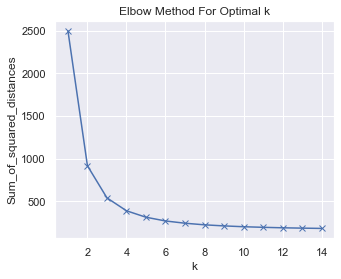

In [407]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(segmentation_nor)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [408]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(segmentation_nor)
data_new=pd.concat([segmentation_d.reset_index(),pd.DataFrame(kmeans.labels_)],axis=1)
data_new.groupby(0).mean()

,index,num_weekly_services_utilized,age,weekly_consumption_hour,discount_price,join_fee,current_sub_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,payment_period_0,payment_period_1,payment_period_2,payment_period_3
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,113346.112702,3.026568,47.983468,28.202358,4.515265,0.137783,0.640821,0.564286,0.101584,0.333452,0.626438,0.243213,0.040336,0.027602,0.062411,0.874370,0.125630,0.450485,0.000452,0.000905,0.001131,0.032902,0.357595,0.153975,0.339270,0.660730,0.365579,0.425824,0.207401,0.001196
1,113796.333525,3.183410,26.702388,31.309079,4.514909,0.100068,0.830894,0.490875,0.049326,0.459306,0.668530,0.195495,0.025567,0.026554,0.083854,0.756988,0.243012,0.429793,0.000000,0.000000,0.000247,0.014305,0.404308,0.148800,0.302121,0.697879,0.200839,0.532555,0.265784,0.000822
2,114387.603208,3.088916,36.488949,29.405393,4.514882,0.112397,0.735883,0.541764,0.070985,0.386881,0.643430,0.215052,0.029159,0.029940,0.082418,0.830434,0.169566,0.425375,0.000082,0.000576,0.000452,0.020892,0.403414,0.147111,0.345384,0.654616,0.280609,0.475098,0.243512,0.000781
3,113976.868175,2.837190,59.884815,25.038331,4.515026,0.162819,0.496866,0.609493,0.141089,0.248709,0.598297,0.290496,0.048922,0.029566,0.032720,0.962510,0.037490,0.493673,0.000867,0.002129,0.002208,0.056609,0.307171,0.135412,0.353333,0.646667,0.508062,0.341625,0.149210,0.001104


In [398]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
segmentation_scaled = minmaxscaler.fit_transform(segmentation_d)

In [399]:
segmentation_scaled

array([[0.21428571, 0.08536585, 0.45098039, ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.12195122, 0.2745098 , ..., 0.        , 1.        ,
        0.        ],
       [0.14285714, 0.52439024, 0.23529412, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.14285714, 0.30487805, 0.29411765, ..., 1.        , 0.        ,
        0.        ],
       [0.21428571, 0.24390244, 0.35294118, ..., 1.        , 0.        ,
        0.        ],
       [0.14285714, 0.37804878, 0.33333333, ..., 1.        , 0.        ,
        0.        ]])

K-means

In [400]:
from sklearn.cluster import KMeans

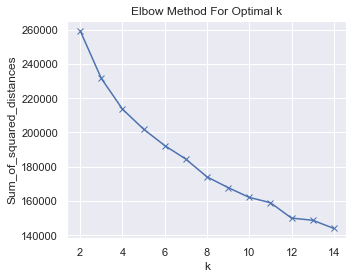

In [401]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(segmentation_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [402]:
kmeans = KMeans(n_clusters = 12, random_state=0).fit(segmentation_scaled)

In [403]:
kmeans.labels_

array([ 9, 10,  2, ...,  0,  4,  4], dtype=int32)

In [404]:
data_new=pd.concat([segmentation_d.reset_index(),pd.DataFrame(kmeans.labels_)],axis=1)
data_new.groupby(0).mean()

,index,num_weekly_services_utilized,age,weekly_consumption_hour,discount_price,join_fee,current_sub_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,payment_period_0,payment_period_1,payment_period_2,payment_period_3
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,114292.388647,3.365539,45.639987,29.247187,4.514186,0.183396,0.913764,0.706463,0.092934,0.200268,0.000000,0.753851,0.081882,0.035666,0.128600,0.830208,0.169792,0.678500,0.000167,0.001005,0.000167,0.023108,0.114702,0.181179,0.000000,1.000000,0.000000,0.998158,0.000000,0.001842
1,113631.660564,2.651597,52.151802,26.902225,4.514498,0.170645,0.192976,0.999813,0.000000,0.000000,0.412479,0.371754,0.055670,0.076966,0.083131,0.864936,0.135064,0.674762,0.001121,0.003176,0.003736,0.107977,0.000000,0.204558,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2,113203.952729,3.154375,44.411731,28.105288,4.514785,0.140191,0.959942,0.713995,0.080709,0.204787,1.000000,0.000000,0.000000,0.000000,0.000000,0.891029,0.108971,0.613596,0.000679,0.000849,0.001528,0.033523,0.150471,0.197403,1.000000,0.000000,0.040737,0.699822,0.257744,0.001697
3,114964.642849,2.745949,49.054254,26.963476,4.515082,0.138454,0.061446,0.644263,0.087656,0.267645,0.469277,0.348341,0.046330,0.057096,0.078956,0.869386,0.130614,0.199130,0.000761,0.001305,0.001523,0.045133,0.672104,0.078195,1.000000,0.000000,0.994889,0.005003,0.000109,0.000000
4,113659.944212,3.006328,40.444553,28.624352,4.514300,0.156615,0.930094,0.000000,0.014604,0.985396,0.853471,0.036997,0.024146,0.016162,0.069224,0.861260,0.138740,0.381560,0.000097,0.000097,0.000097,0.024340,0.442703,0.150424,0.101353,0.898647,0.000000,0.999124,0.000000,0.000876
5,113242.827533,3.000639,44.568413,28.169372,4.514382,0.175263,0.927012,0.910295,0.089340,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.889833,0.110167,0.591852,0.000274,0.001005,0.001736,0.027131,0.213392,0.163150,0.000000,1.000000,0.000000,0.997716,0.000000,0.002284
6,114336.466238,3.098141,40.681429,28.579040,4.516287,0.029647,0.999863,0.000000,0.000000,1.000000,0.777747,0.113860,0.032258,0.012438,0.063696,0.894478,0.105522,0.460224,0.000273,0.001504,0.000957,0.031028,0.291689,0.211728,0.305905,0.694095,0.000000,0.000000,0.998496,0.001504
7,114987.102137,2.737804,47.092456,27.315075,4.515668,0.134105,0.066792,1.000000,0.000000,0.000000,0.540384,0.301438,0.036689,0.039376,0.082113,0.883349,0.116651,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.993549,0.006451,0.000000,0.000000
8,112898.023545,2.860539,53.515508,27.468865,4.514765,0.160368,0.088748,0.000000,0.997736,0.000000,0.434458,0.413629,0.055694,0.047544,0.048676,0.837220,0.162780,0.488341,0.000226,0.001358,0.000679,0.046185,0.329862,0.128820,0.242925,0.757075,0.980983,0.017433,0.000000,0.001585


In [327]:
data_new

,index,num_weekly_services_utilized,age,weekly_consumption_hour,discount_price,join_fee,current_sub_TF,payment_period,trial_completed,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,0
0,2,3.0,25.0,36.001186,4.5141,0.1101,False,0,True,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,3
1,4,4.0,28.0,22.951579,4.5141,0.0367,True,2,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,9
2,6,2.0,61.0,20.051667,4.5141,0.3303,True,1,True,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,2
3,7,3.0,23.0,34.551230,4.5141,0.0000,True,1,True,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,5
4,9,3.0,71.0,28.751405,4.5141,0.3303,False,0,False,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92781,227616,4.0,44.0,27.301448,4.5141,0.0000,True,1,True,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,5
92782,227619,3.0,32.0,30.201361,4.5141,0.0000,True,2,True,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,2
92783,227622,2.0,43.0,24.401536,4.5141,0.0000,True,1,True,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,5
92784,227623,3.0,38.0,28.751405,4.5141,0.3303,True,1,True,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,11


In [409]:
from sklearn.mixture import GaussianMixture

In [433]:
gmmModel = GaussianMixture(n_components=3, covariance_type='diag', random_state=0)
gmmModel.fit(segmentation_nor)
labels = gmmModel.predict(segmentation_nor)
print(labels)

[0 0 1 ... 1 0 1]


In [434]:
labels=pd.DataFrame(labels)

In [435]:
segmentation_d['cluster']=labels

In [436]:
segmentation_d

,level_0,index,num_weekly_services_utilized,age,weekly_consumption_hour,discount_price,join_fee,current_sub_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,payment_period_0,payment_period_1,payment_period_2,payment_period_3,cluster
0,0,2,3.0,25.0,36.001186,4.5141,0.1101,False,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1,1,4,4.0,28.0,22.951579,4.5141,0.0367,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,2,6,2.0,61.0,20.051667,4.5141,0.3303,True,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,3,7,3.0,23.0,34.551230,4.5141,0.0000,True,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4,4,9,3.0,71.0,28.751405,4.5141,0.3303,False,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92781,92781,227616,4.0,44.0,27.301448,4.5141,0.0000,True,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
92782,92782,227619,3.0,32.0,30.201361,4.5141,0.0000,True,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
92783,92783,227622,2.0,43.0,24.401536,4.5141,0.0000,True,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
92784,92784,227623,3.0,38.0,28.751405,4.5141,0.3303,True,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0


In [437]:
segmentation_d.groupby('cluster').mean()

,level_0,index,num_weekly_services_utilized,age,weekly_consumption_hour,discount_price,join_fee,current_sub_TF,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,payment_period_0,payment_period_1,payment_period_2,payment_period_3
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,46510.109591,114139.584270,3.113757,36.364893,29.598107,4.514910,0.119795,0.743726,0.518445,0.069815,0.411338,0.630220,0.227766,0.000000,0.000000,0.142015,0.727941,0.272059,0.447049,0.000000,0.000000,0.000000,0.000000,0.391287,0.159632,0.334069,0.665931,0.278533,0.482935,0.238531,0.000000
1,46316.751696,113664.290589,2.874125,53.003360,26.663189,4.515248,0.144990,0.592525,0.594641,0.119461,0.285200,0.710153,0.289847,0.000000,0.000000,0.000000,1.000000,0.000000,0.466802,0.000742,0.000000,0.000000,0.044555,0.349960,0.135563,0.340883,0.659117,0.411185,0.400755,0.188060,0.000000
2,46221.557760,113430.541579,3.326579,47.485296,28.442113,4.514585,0.130115,0.512030,0.584213,0.111299,0.303644,0.095117,0.019840,0.493739,0.373575,0.017729,0.848600,0.151400,0.397355,0.000563,0.013508,0.014774,0.153933,0.274659,0.142395,0.365555,0.634445,0.495427,0.317996,0.173350,0.013226


In [206]:
data_new.to_csv('segmentation.csv')

In [356]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92786 entries, 2 to 227624
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   package_type                  92732 non-null  object 
 1   num_weekly_services_utilized  92786 non-null  float64
 2   preferred_genre               92786 non-null  object 
 3   age                           92786 non-null  float64
 4   intended_use                  92576 non-null  object 
 5   weekly_consumption_hour       92786 non-null  float64
 6   male_TF                       92786 non-null  object 
 7   op_sys                        92786 non-null  object 
 8   discount_price                92786 non-null  float64
 9   join_fee                      92786 non-null  float64
 10  current_sub_TF                92786 non-null  bool   
 11  payment_period                92786 non-null  object 
 12  trial_completed               92786 non-null  bool   
dtype

In [362]:
seg_c = segmentation[['package_type','preferred_genre','intended_use','op_sys','current_sub_TF',
                     'payment_period','trial_completed']]

In [367]:
seg_c = pd.get_dummies(data=seg_c).reset_index()

In [368]:
seg_c

,index,current_sub_TF,trial_completed,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,payment_period_0,payment_period_1,payment_period_2,payment_period_3
0,2,False,True,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0
1,4,True,True,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
2,6,True,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,7,True,True,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,9,False,False,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92781,227616,True,True,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
92782,227619,True,True,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
92783,227622,True,True,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
92784,227623,True,True,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [358]:
seg_n = segmentation[['num_weekly_services_utilized','age','weekly_consumption_hour','discount_price','join_fee']]

In [359]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(seg_n)
seg_n_nor=transformer.transform(seg_n)

In [370]:
seg_n_nor=pd.DataFrame(seg_n_nor)

In [371]:
seg_nor = pd.concat([seg_c,seg_n_nor],axis=1)

In [373]:
seg_nor.drop('index',axis=1,inplace=True)

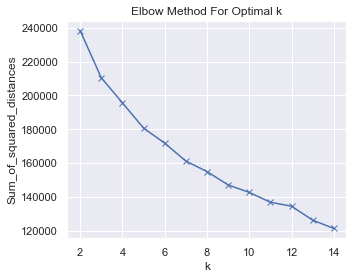

In [375]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(seg_nor)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [382]:
kmeans = KMeans(n_clusters = 5, random_state=0).fit(segmentation_scaled)
kmeans.labels_

array([4, 1, 0, ..., 1, 3, 3], dtype=int32)

In [383]:
data_new=pd.concat([segmentation_d.reset_index(),pd.DataFrame(kmeans.labels_)],axis=1)
data_new.groupby(0).mean()

,index,num_weekly_services_utilized,age,weekly_consumption_hour,discount_price,join_fee,current_sub_TF,trial_completed,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS,payment_period_0,payment_period_1,payment_period_2,payment_period_3
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,113347.006818,3.306517,43.970304,28.498908,4.514966,0.128857,0.950113,0.997273,0.582048,0.072832,0.344508,0.697339,0.198890,0.042364,0.016175,0.045232,0.872437,0.127563,0.565215,0.000470,0.000940,0.001175,0.031550,0.212949,0.185772,1.000000,0.000000,0.034888,0.637578,0.326124,0.001411
1,113950.981731,3.142019,44.849205,28.512980,4.515181,0.134428,0.950930,0.998439,0.908021,0.091600,0.000000,0.709886,0.191047,0.034935,0.014261,0.049871,0.881651,0.118349,0.611409,0.000338,0.001013,0.001350,0.027003,0.182735,0.173664,0.000000,1.000000,0.033838,0.658453,0.306190,0.001519
2,114034.427464,2.825060,50.818548,27.565300,4.514946,0.149621,0.083630,0.712132,0.588110,0.190798,0.220310,0.000000,0.809700,0.049566,0.070047,0.070687,0.834376,0.165624,0.382805,0.000569,0.001778,0.001707,0.054615,0.431020,0.124307,0.344261,0.655739,0.986560,0.011876,0.001422,0.000142
3,113899.292718,3.032972,40.896147,28.683585,4.514928,0.118457,0.956058,0.997707,0.000000,0.013883,0.985931,0.744531,0.146080,0.026836,0.015308,0.067245,0.865262,0.134738,0.466377,0.000124,0.000806,0.000372,0.029191,0.317632,0.183638,0.000000,1.000000,0.030059,0.649644,0.318686,0.001611
4,114131.642963,2.609989,47.851421,26.744058,4.515183,0.136294,0.061521,0.700170,0.561521,0.137401,0.300057,0.832406,0.000000,0.036890,0.042054,0.088649,0.892395,0.107605,0.148241,0.000568,0.000795,0.001022,0.033258,0.768275,0.045857,0.307832,0.692168,0.996765,0.003178,0.000057,0.000000


## Advertising Efficiency

In [476]:
channel = pd.read_csv('channel_spend_graduate.csv')
channel.head()

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


In [477]:
subscribers = pd.read_csv('subscribers.csv')

In [478]:
bing = subscribers[subscribers['attribution_technical'] == 'bing']
display = subscribers[subscribers['attribution_technical'] == 'display']
facebook = subscribers[subscribers['attribution_technical'] == 'facebook']
search = subscribers[subscribers['attribution_technical'] == 'search']
youtube = subscribers[subscribers['attribution_technical'] == 'youtube']

### Average CAC (attribution_technical)

In [479]:
x1 = pd.concat([bing,display,facebook,search,youtube],axis=0)
x1=x1.reset_index()
x1['ym']=''
for i in range(109023):
    a = x1.loc[i,['account_creation_date']].str.split('-')
    x1.loc[i,['ym']]=a[0][0]+a[0][1]

In [480]:
channel_ym=x1.groupby(['ym','attribution_technical'])['index'].count()
channel_ym=pd.DataFrame(channel_ym)
channel_ym=channel_ym.reset_index()
channel_ym=channel_ym.rename(columns={'ym':'date','attribution_technical':'channel','index':'count'})
channel['date'] = channel['date'].apply(str)
channel_all=pd.merge(channel,channel_ym,how='left',on=['date','channel'])
channel_all['avg_cac']=channel_all['spend_AED']/channel_all['count']
channel_all
average_cac = pd.pivot_table(channel_all, index= 'date', columns ='channel',values='avg_cac')
average_cac

channel,bing,display,facebook,search,youtube
date,,,,,
201907,3.333333,0.272727,0.899011,9.789157,11.250000
201908,12.676056,0.270270,1.319127,9.541001,12.000000
201909,11.904762,1.083333,1.713167,10.259179,50.000000
201910,12.790698,0.380000,1.791548,10.287184,11.818182
201911,12.621359,0.322222,1.769912,9.960159,11.702128
201912,10.714286,0.276786,1.722653,10.079576,11.842105
202001,12.209302,0.276119,1.749086,10.066290,11.783784
202002,12.211221,0.275660,1.752629,10.232558,11.804878


In [481]:
average_cac.to_csv('average_cac.csv')

### Marginal CAC (attribution_technical)

In [482]:
mb_cac = channel_all[channel_all['channel']=='bing']
mb_cac = mb_cac.sort_values(by = 'spend_AED', ascending = True)
mb_cac = mb_cac.reset_index()
mb_cac_v = [0,0,0,0,0,0,0]
for i in range(7):
    mb_cac_v[i] = (mb_cac.iloc[i+1,3] - mb_cac.iloc[i,3])/(mb_cac.iloc[i+1,4] - mb_cac.iloc[i,4]) 
mb_cac_v

[1.0869565217391304,
 -10.204081632653061,
 7.6923076923076925,
 50.0,
 11.764705882352942,
 11.594202898550725,
 12.213740458015268]

In [483]:
md_cac = channel_all[channel_all['channel']=='display']
md_cac = md_cac.sort_values(by = 'spend_AED', ascending = True)
md_cac = md_cac.reset_index()
md_cac_v = [0,0,0,0,0,0,0]
for i in range(7):
    md_cac_v[i] = (md_cac.iloc[i+1,3] - md_cac.iloc[i,3])/(md_cac.iloc[i+1,4] - md_cac.iloc[i,4]) 
md_cac_v

[-0.03125,
 0.15789473684210525,
 0.041666666666666664,
 0.5625,
 0.09090909090909091,
 0.27510917030567683,
 0.27692307692307694]

In [484]:
mf_cac = channel_all[channel_all['channel']=='facebook']
mf_cac = mf_cac.sort_values(by = 'spend_AED', ascending = True)
mf_cac = mf_cac.reset_index()
mf_cac_v = [0,0,0,0,0,0,0]
for i in range(7):
    mf_cac_v[i] = (mf_cac.iloc[i+1,3] - mf_cac.iloc[i,3])/(mf_cac.iloc[i+1,4] - mf_cac.iloc[i,4]) 
mf_cac_v

[-0.38639876352395675,
 3.125,
 0.5608524957936063,
 -0.5356186395286556,
 1.5384615384615385,
 4.975124378109452,
 1.7113519680547633]

In [485]:
ms_cac = channel_all[channel_all['channel']=='search']
ms_cac = ms_cac.sort_values(by = 'spend_AED', ascending = True)
ms_cac = ms_cac.reset_index()
ms_cac_v = [0,0,0,0,0,0,0]
for i in range(7):
    ms_cac_v[i] = (ms_cac.iloc[i+1,3] - ms_cac.iloc[i,3])/(ms_cac.iloc[i+1,4] - ms_cac.iloc[i,4]) 
ms_cac_v

[9.00163666121113,
 -5.747126436781609,
 10.395010395010395,
 5.649717514124294,
 10.317460317460318,
 9.900990099009901,
 13.215859030837004]

In [486]:
my_cac = channel_all[channel_all['channel']=='youtube']
my_cac = my_cac.sort_values(by = 'spend_AED', ascending = True)
my_cac = my_cac.reset_index()
my_cac_v = [0,0,0,0,0,0,0]
for i in range(7):
    my_cac_v[i] = (my_cac.iloc[i+1,3] - my_cac.iloc[i,3])/(my_cac.iloc[i+1,4] - my_cac.iloc[i,4]) 
my_cac_v

[-1.6666666666666667,
 3.3333333333333335,
 12.5,
 11.5625,
 12.068965517241379,
 11.782945736434108,
 11.757575757575758]

In [487]:
marginal_cac = pd.DataFrame([mb_cac_v, md_cac_v, mf_cac_v, ms_cac_v, my_cac_v])
marginal_cac.index = ['bing', 'display', 'facebook', 'search', 'youtube']
marginal_cac.columns = ['tier1','tier2','tier3','tier4','tier5','tier6','tier7']
marginal_cac.T

,bing,display,facebook,search,youtube
tier1,1.086957,-0.031250,-0.386399,9.001637,-1.666667
tier2,-10.204082,0.157895,3.125000,-5.747126,3.333333
tier3,7.692308,0.041667,0.560852,10.395010,12.500000
tier4,50.000000,0.562500,-0.535619,5.649718,11.562500
tier5,11.764706,0.090909,1.538462,10.317460,12.068966
tier6,11.594203,0.275109,4.975124,9.900990,11.782946
tier7,12.213740,0.276923,1.711352,13.215859,11.757576


In [488]:
(marginal_cac.T).to_csv('marginal.csv')

## Churn Analysis

In [443]:
subscribers = pd.read_csv('subscribers.csv')

In [444]:
subscribers['churn'] = ''

In [445]:
subscribers.drop('Unnamed: 0',axis=1,inplace=True)
pd.set_option('display.max_columns',None)
subscribers.head(10)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True,
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True,
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,
5,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,UAE,bing,tv,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 20:15:43,2020-03-17 20:15:43,False,0.3303,ar,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN,True,
6,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,2020-03-04 18:30:15,False,0.3303,ar,Standard Charter,14,True,1,2020-03-04 18:30:15,2020-07-04 18:30:15,NaN,True,
7,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,2020-03-19 14:52:22,False,0.0000,ar,RAKBANK,14,True,1,2020-03-19 14:52:22,2020-07-19 14:52:22,NaN,True,
8,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,2020-03-08 17:50:25,False,0.6606,ar,NaN,14,True,1,2020-03-08 17:50:25,2020-07-08 17:50:25,NaN,True,
9,23452753,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,UAE,search,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-21 14:17:53,2020-02-04 14:17:53,False,0.3303,ar,NaN,14,False,0,NaN,NaN,2020-01-27 00:00:00,False,


In [446]:
def churn(row):
    if row.payment_period== 0 and row.current_sub_TF==False:
        return 1
    elif row.payment_period== 0 and pd.notna(row.cancel_date):
        return 1
    elif row.payment_period>=1:
        return 0
    else:
        return 3

In [447]:
subscribers['churn'] = subscribers.apply(churn,axis=1)
subscribers=subscribers[subscribers['churn']!=3]

In [448]:
subscribers.drop('months_per_bill_period',axis=1,inplace=True)
subscribers.drop('country',axis=1,inplace=True)
subscribers.drop('language',axis=1,inplace=True)
subscribers.drop('account_creation_date',axis=1,inplace=True)
subscribers.drop('trial_end_date',axis=1,inplace=True)
subscribers.drop('last_payment',axis=1,inplace=True)
subscribers.drop('next_payment',axis=1,inplace=True)
subscribers.drop('cancel_date',axis=1,inplace=True)
subscribers.drop('payment_type',axis=1,inplace=True)

In [449]:
churn=subscribers[(subscribers['age']<=100) & (subscribers['age']>0)]
churn = churn[churn['weekly_consumption_hour']>=0]
churn = churn[churn['num_ideal_streaming_services']>=0]
churn = churn[churn['join_fee']>=0]

In [451]:
churn=churn[churn['package_type'].notna()]
churn=churn[churn['preferred_genre'].notna()]
churn=churn[churn['intended_use'].notna()]
churn=churn[churn['num_weekly_services_utilized'].notna()]
churn=churn[churn['num_ideal_streaming_services'].notna()]
churn=churn[churn['weekly_consumption_hour'].notna()]

In [452]:
data_churn = churn[['package_type','preferred_genre', 'intended_use', 'weekly_consumption_hour',
                    'num_weekly_services_utilized','age', 'male_TF','attribution_technical', 
                    'op_sys', 'plan_type','discount_price', 'initial_credit_card_declined',
                    'join_fee', 'churn']]

In [453]:
data_churn = pd.get_dummies(data=data_churn, columns=['package_type','preferred_genre', 'intended_use',
                                               'male_TF', 'attribution_technical', 'op_sys', 'plan_type'])

In [454]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_churn, test_size=0.2)
train, vali = train_test_split(train, test_size=0.3)

In [455]:
train_x = train.drop(['churn'], axis=1)
train_y = train.iloc[:,6]

vali_x = vali.drop(['churn'], axis=1)
vali_y = vali.iloc[:,6]

test_x = test.drop(['churn'], axis=1)
test_y = test.iloc[:,6]

## xgboost

In [456]:
import xgboost as xgb
from sklearn import metrics 

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(train_x, train_y)
y_pred = xgb_model.predict(vali_x)
y_prob = xgb_model.predict_proba(vali_x)[:,1]
print("Accuracy:",metrics.accuracy_score(vali_y, y_pred))
print("AUC:",metrics.roc_auc_score(vali_y, y_prob))
print(metrics.classification_report(vali_y,y_pred))

Accuracy: 0.820479098168154
AUC: 0.894078528361994
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14253
           1       0.74      0.70      0.72      7037

    accuracy                           0.82     21290
   macro avg       0.80      0.79      0.79     21290
weighted avg       0.82      0.82      0.82     21290



## logistic regression

In [469]:
from sklearn import linear_model
from sklearn import metrics 

clf = linear_model.LogisticRegression(penalty='l2')
clf.fit(train_x, train_y)

y_pred = clf.predict(vali_x)
y_prob = clf.predict_proba(vali_x)[:,1]

print("Accuracy:",metrics.accuracy_score(vali_y, y_pred))
print("AUC:",metrics.roc_auc_score(vali_y, y_prob))
print(metrics.classification_report(vali_y,y_pred))

Accuracy: 0.8239549084077031
AUC: 0.8972493578434448
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     14253
           1       0.76      0.69      0.72      7037

    accuracy                           0.82     21290
   macro avg       0.81      0.79      0.80     21290
weighted avg       0.82      0.82      0.82     21290



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [458]:
y_pred = xgb_model.predict(test_x)
y_prob = xgb_model.predict_proba(test_x)[:,1]
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("AUC:",metrics.roc_auc_score(test_y, y_prob))
print(metrics.classification_report(test_y,y_pred))

Accuracy: 0.821215195581107
AUC: 0.8923447146079613
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     11887
           1       0.75      0.70      0.72      5855

    accuracy                           0.82     17742
   macro avg       0.80      0.79      0.79     17742
weighted avg       0.82      0.82      0.82     17742



In [459]:
y_pred = clf.predict(test_x)
y_prob = clf.predict_proba(test_x)[:,1]

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("AUC:",metrics.roc_auc_score(test_y, y_prob))
print(metrics.classification_report(test_y,y_pred))

Accuracy: 0.8215533761695412
AUC: 0.8966983429285034
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11887
           1       0.76      0.67      0.71      5855

    accuracy                           0.82     17742
   macro avg       0.80      0.78      0.79     17742
weighted avg       0.82      0.82      0.82     17742



In [461]:
y_prob

array([0.20659842, 0.03450655, 0.79367488, ..., 0.93138555, 0.0227482 ,
       0.00404055])

In [ ]:
y_pred = clf.predict()
y_prob = clf.predict_proba(test_x)[:,1]

In [467]:
all_x = data_churn.drop(['churn'], axis=1)
all_y = data_churn.iloc[:,6]

In [471]:
all_y_pred = clf.predict(all_x)
all_y_prob = clf.predict_proba(all_x)[:,1]

In [474]:
pd.DataFrame(all_y_prob).to_csv('y.csv')

In [475]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88706 entries, 2 to 227624
Data columns (total 64 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   weekly_consumption_hour                        88706 non-null  float64
 1   num_weekly_services_utilized                   88706 non-null  float64
 2   age                                            88706 non-null  float64
 3   discount_price                                 88706 non-null  float64
 4   initial_credit_card_declined                   88706 non-null  bool   
 5   join_fee                                       88706 non-null  float64
 6   churn                                          88706 non-null  int64  
 7   package_type_base                              88706 non-null  uint8  
 8   package_type_economy                           88706 non-null  uint8  
 9   package_type_enhanced                          88